Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [1]:
# Libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline    

In [13]:
yelp_poi_df = pd.read_csv("../data/yelp_poi.csv")
yelp_poi_df.rename(columns={'bike_station':'station_name','name':'poi_name','categories':'poi_categories','address':'poi_address','distance':'poi_distance','ratings':'poi_ratings','review_count':'poi_review_count'}, inplace=True)
yelp_poi_df

,station_name,poi_name,poi_categories,poi_address,poi_distance,poi_latitude,poi_longitude,poi_ratings,poi_review_count
0,Hess at king,La Luna,Middle Eastern,"306 King Street W,Hamilton, ON L8P 1B1,Canada",108.424550,43.259422,-79.878488,4.0,63
1,Hess at king,Hambrgr,Burgers,"49 King William Street,Hamilton, ON L8R 1A2,Ca...",858.672096,43.257210,-79.866900,4.5,202
2,Hess at king,Earth To Table : Bread Bar,Pizza,"258 Locke Street S,Hamilton, ON L8P 4B9,Canada",1052.141521,43.252840,-79.887020,4.0,293
3,Hess at king,The Ship,Seafood,"23 Augusta Street,Hamilton, ON L8N 1P6,Canada",970.855528,43.252150,-79.870000,4.0,208
4,Hess at king,Berkeley North,Bars,"31 King William Street,Hamilton, ON L8R 1A1,Ca...",792.544458,43.257405,-79.867715,4.5,43
...,...,...,...,...,...,...,...,...,...
2801,Cannon at Ottawa,Mr Beast Burger,Burgers,"224 Ottawa Street N,Hamilton, ON L8H 3Z6,Canada",149.392720,43.248686,-79.817039,4.0,1
2802,Cannon at Ottawa,Bernie’s Tavern,Modern European,"1101-1103 Cannon St E,Hamilton, ON L8L 2J5,Canada",293.018582,43.248570,-79.821395,3.5,3
2803,Cannon at Ottawa,The Hearty Hooligan,Cafes,"292 Ottawa Street N,Hamilton, ON L8H 3Z9,Canada",324.046798,43.250241,-79.816466,4.5,7
2804,Cannon at Ottawa,Simply Italian Bakery,Bakeries,"212 Ottawa Street N,Hamilton, ON L8H 3Z6,Canada",116.158933,43.248448,-79.817282,4.0,1


In [14]:
# Read bike station data from CSV into a DataFrame
bike_stations_df = pd.read_csv("../data/hamilton_bike_stations.csv")
bike_stations_df.rename(columns={'name':'station_name','latitude':'station_latitude','longitude':'station_longitude'}, inplace=True)
bike_stations_df

,station_name,station_latitude,station_longitude,free_bikes,number_of_bikes
0,Hess at king,43.259126,-79.877212,10,12
1,Bayfront Park,43.269288,-79.871327,9,34
2,Bay at Strachan,43.267859,-79.867923,7,24
3,Bay at Mulberry,43.263198,-79.871803,9,14
4,City Hall,43.256132,-79.874499,7,16
...,...,...,...,...,...
140,Van Wagner's Beach,43.260008,-79.766388,0,10
141,King William at James,43.257635,-79.868487,3,6
142,Westdale Village - Paisley,43.261712,-79.905901,11,11
143,Westdale Aviary,43.264869,-79.907480,2,8


In [15]:
# Merge the two dataframes based on the 'station_name' column
merged_df = bike_stations_df.merge(yelp_poi_df, on='station_name')
merged_df

,station_name,station_latitude,station_longitude,free_bikes,number_of_bikes,poi_name,poi_categories,poi_address,poi_distance,poi_latitude,poi_longitude,poi_ratings,poi_review_count
0,Hess at king,43.259126,-79.877212,10,12,La Luna,Middle Eastern,"306 King Street W,Hamilton, ON L8P 1B1,Canada",108.424550,43.259422,-79.878488,4.0,63
1,Hess at king,43.259126,-79.877212,10,12,Hambrgr,Burgers,"49 King William Street,Hamilton, ON L8R 1A2,Ca...",858.672096,43.257210,-79.866900,4.5,202
2,Hess at king,43.259126,-79.877212,10,12,Earth To Table : Bread Bar,Pizza,"258 Locke Street S,Hamilton, ON L8P 4B9,Canada",1052.141521,43.252840,-79.887020,4.0,293
3,Hess at king,43.259126,-79.877212,10,12,The Ship,Seafood,"23 Augusta Street,Hamilton, ON L8N 1P6,Canada",970.855528,43.252150,-79.870000,4.0,208
4,Hess at king,43.259126,-79.877212,10,12,Berkeley North,Bars,"31 King William Street,Hamilton, ON L8R 1A1,Ca...",792.544458,43.257405,-79.867715,4.5,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2801,Cannon at Ottawa,43.247565,-79.818050,6,7,Mr Beast Burger,Burgers,"224 Ottawa Street N,Hamilton, ON L8H 3Z6,Canada",149.392720,43.248686,-79.817039,4.0,1
2802,Cannon at Ottawa,43.247565,-79.818050,6,7,Bernie’s Tavern,Modern European,"1101-1103 Cannon St E,Hamilton, ON L8L 2J5,Canada",293.018582,43.248570,-79.821395,3.5,3
2803,Cannon at Ottawa,43.247565,-79.818050,6,7,The Hearty Hooligan,Cafes,"292 Ottawa Street N,Hamilton, ON L8H 3Z9,Canada",324.046798,43.250241,-79.816466,4.5,7
2804,Cannon at Ottawa,43.247565,-79.818050,6,7,Simply Italian Bakery,Bakeries,"212 Ottawa Street N,Hamilton, ON L8H 3Z6,Canada",116.158933,43.248448,-79.817282,4.0,1


In [16]:
merged_df.to_csv('../data/combined_station_yelp.csv', index=False)

In [8]:
foursquare_poi_df = pd.read_csv("../data/foursquare_poi.csv")
foursquare_poi_df.rename(columns={'bike_station':'station_name','name':'poi_name','categories':'poi_categories','address':'poi_address','distance':'poi_distance','ratings':'poi_ratings',
                                  'total_ratings':'poi_total_ratings','total_tips':'poi_total_tips','total_photos':'poi_total_photos'}, inplace=True)
foursquare_poi_df

,station_name,poi_name,poi_categories,poi_address,poi_distance,poi_latitude,poi_longitude,poi_ratings,poi_total_ratings,poi_total_tips,poi_total_photos
0,Hess at king,Coop Wicked Chicken Hamilton,Fried Chicken Joint,"274 King St W (Hess St), Hamilton ON L8P 1J6",19,43.259271,-79.877373,4.0,9.0,2.0,6.0
1,Hess at king,Coop Hamilton,Fried Chicken Joint,"274 King St W, Hamilton ON L8P 1J6",22,43.259153,-79.877446,3.9,13.0,2.0,7.0
2,Hess at king,Ark + Anchor,Coffee Shop,"300 King St W, Hamilton ON L8P 1B1",81,43.259332,-79.878032,4.0,11.0,2.0,13.0
3,Hess at king,La Luna Restaurant Downtown,Lebanese Restaurant,"306 King St W (at Queen St), Hamilton ON L8P 1B1",111,43.259414,-79.878417,4.3,35.0,15.0,8.0
4,Hess at king,Hess Village,Neighborhood,Hamilton ON,77,43.258514,-79.877755,4.0,18.0,3.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...
2767,Cannon at Ottawa,Rankin's Bar & Grill,Bar,"1342 Main St E, Hamilton ON L8K 1B5",890,43.240773,-79.812412,4.0,16.0,8.0,28.0
2768,Cannon at Ottawa,Tim Hortons,Restaurant,"954 Barton St E, Hamilton ON L8L 3C5",667,43.252714,-79.822252,3.2,0.0,0.0,1.0
2769,Cannon at Ottawa,Pizza Pizza,Pizzeria,"1296 King St E, Hamilton ON L8M 1G8",686,43.243909,-79.824758,3.1,1.0,0.0,2.0
2770,Cannon at Ottawa,Buddys Roadhouse,Restaurant,"1360 King St E, Hamilton ON L8M 1H5",805,43.240965,-79.822316,3.4,9.0,2.0,17.0


In [10]:
# Merge the two dataframes based on the 'station_name' column
fsq_merged_df = bike_stations_df.merge(foursquare_poi_df, on='station_name')
fsq_merged_df

,station_name,station_latitude,station_longitude,free_bikes,number_of_bikes,poi_name,poi_categories,poi_address,poi_distance,poi_latitude,poi_longitude,poi_ratings,poi_total_ratings,poi_total_tips,poi_total_photos
0,Hess at king,43.259126,-79.877212,10,12,Coop Wicked Chicken Hamilton,Fried Chicken Joint,"274 King St W (Hess St), Hamilton ON L8P 1J6",19,43.259271,-79.877373,4.0,9.0,2.0,6.0
1,Hess at king,43.259126,-79.877212,10,12,Coop Hamilton,Fried Chicken Joint,"274 King St W, Hamilton ON L8P 1J6",22,43.259153,-79.877446,3.9,13.0,2.0,7.0
2,Hess at king,43.259126,-79.877212,10,12,Ark + Anchor,Coffee Shop,"300 King St W, Hamilton ON L8P 1B1",81,43.259332,-79.878032,4.0,11.0,2.0,13.0
3,Hess at king,43.259126,-79.877212,10,12,La Luna Restaurant Downtown,Lebanese Restaurant,"306 King St W (at Queen St), Hamilton ON L8P 1B1",111,43.259414,-79.878417,4.3,35.0,15.0,8.0
4,Hess at king,43.259126,-79.877212,10,12,Hess Village,Neighborhood,Hamilton ON,77,43.258514,-79.877755,4.0,18.0,3.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2767,Cannon at Ottawa,43.247565,-79.818050,6,7,Rankin's Bar & Grill,Bar,"1342 Main St E, Hamilton ON L8K 1B5",890,43.240773,-79.812412,4.0,16.0,8.0,28.0
2768,Cannon at Ottawa,43.247565,-79.818050,6,7,Tim Hortons,Restaurant,"954 Barton St E, Hamilton ON L8L 3C5",667,43.252714,-79.822252,3.2,0.0,0.0,1.0
2769,Cannon at Ottawa,43.247565,-79.818050,6,7,Pizza Pizza,Pizzeria,"1296 King St E, Hamilton ON L8M 1G8",686,43.243909,-79.824758,3.1,1.0,0.0,2.0
2770,Cannon at Ottawa,43.247565,-79.818050,6,7,Buddys Roadhouse,Restaurant,"1360 King St E, Hamilton ON L8M 1H5",805,43.240965,-79.822316,3.4,9.0,2.0,17.0


In [11]:
fsq_merged_df.to_csv('../data/combined_station_fsq.csv', index=False)

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

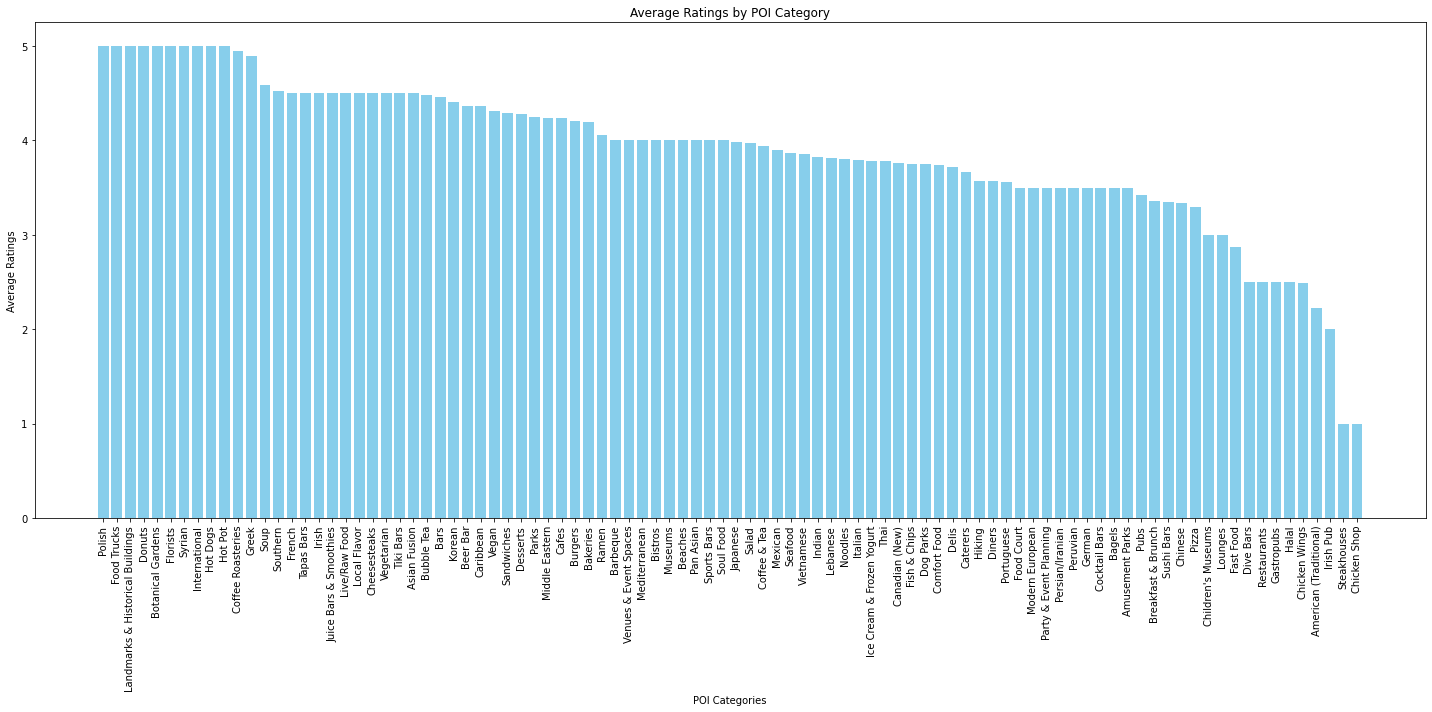

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have already loaded your dataframe
df = pd.read_csv("../data/combined_bikes_yelp.csv")

# Group the data by 'poi_categories' and calculate the average ratings for each category
average_ratings_by_category = df.groupby('poi_categories')['poi_ratings'].mean().reset_index()

# Sort the categories by average rating in descending order
average_ratings_by_category = average_ratings_by_category.sort_values(by='poi_ratings', ascending=False)

# Create a bar chart
plt.figure(figsize=(20, 10))
plt.bar(average_ratings_by_category['poi_categories'], average_ratings_by_category['poi_ratings'], color='skyblue')
plt.xlabel('POI Categories')
plt.ylabel('Average Ratings')
plt.title('Average Ratings by POI Category')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()


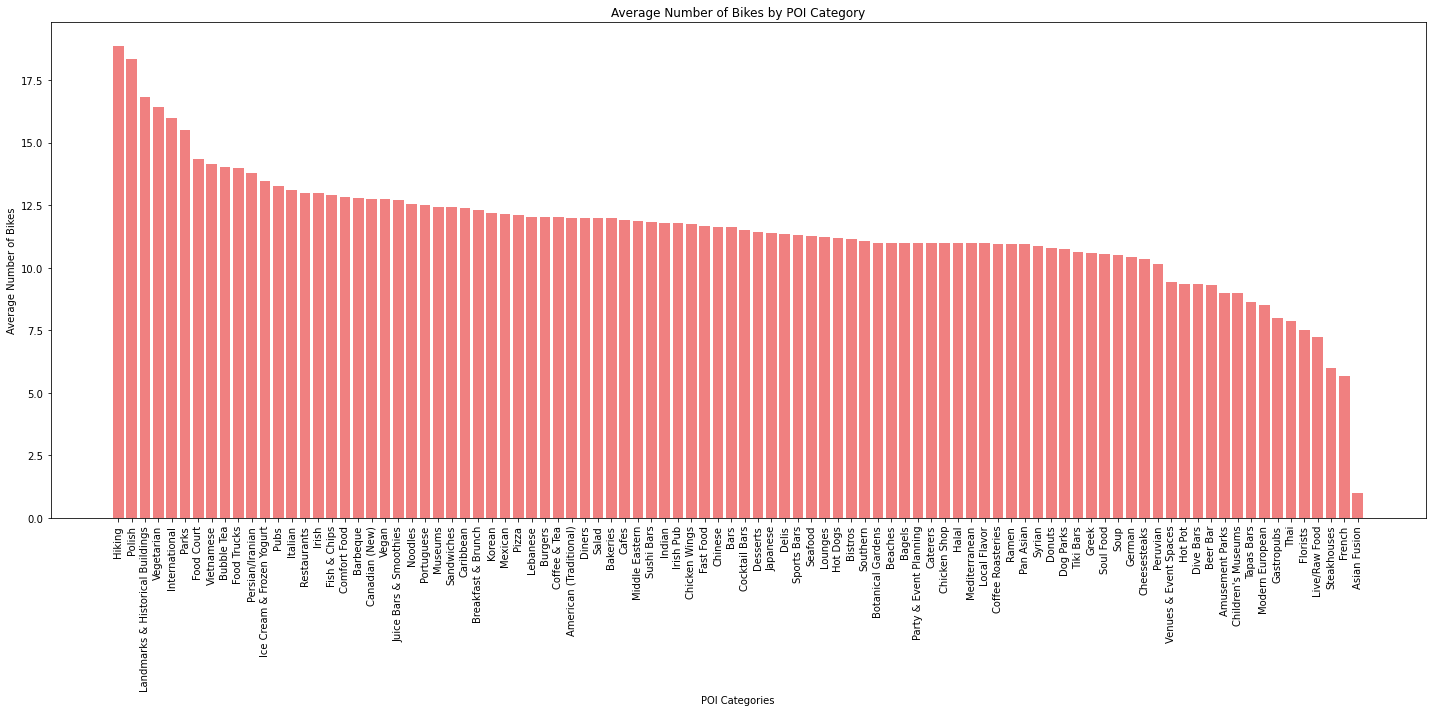

In [22]:
# Group the data by 'poi_categories' and calculate the average number of bikes for each category
average_bikes_by_category = df.groupby('poi_categories')['number_of_bikes'].mean().reset_index()

# Sort the categories by average number of bikes in descending order
average_bikes_by_category = average_bikes_by_category.sort_values(by='number_of_bikes', ascending=False)

# Create a bar chart
plt.figure(figsize=(20, 10))
plt.bar(average_bikes_by_category['poi_categories'], average_bikes_by_category['number_of_bikes'], color='lightcoral')
plt.xlabel('POI Categories')
plt.ylabel('Average Number of Bikes')
plt.title('Average Number of Bikes by POI Category')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [3]:
# SQL
import sqlite3
from sqlite3 import Error
import csv

def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")
        
def execute_read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")
        


In [4]:
# Create or connect to the SQLite database file
connection = create_connection("../data/project.sqlite")

Connection to SQLite DB successful


In [5]:
# Create a table to store information about bike stations
create_bike_stations_table = '''
CREATE TABLE IF NOT EXISTS bike_stations (
    station_id INTEGER PRIMARY KEY,
    station_name TEXT,
    station_latitude REAL,
    station_longitude REAL,
    free_bikes INTEGER,
    number_of_bikes INTEGER
);
'''

execute_query(connection, create_bike_stations_table)

Query executed successfully


In [8]:
create_merged_foursquare_table = '''
CREATE TABLE IF NOT EXISTS fsq_merged (
    id INTEGER PRIMARY KEY,
    station_name TEXT,
    station_latitude REAL,
    station_longitude REAL,
    free_bikes INTEGER,
    number_of_bikes INTEGER,
    poi_name TEXT,
    poi_categories TEXT,
    poi_address TEXT,
    poi_distance INTEGER,
    poi_latitude REAL,
    poi_longitude REAL,
    poi_ratings REAL,
    poi_total_ratings REAL,
    poi_total_tips REAL,
    poi_total_photos INTEGER
);
'''
execute_query(connection, create_merged_foursquare_table)

Query executed successfully


In [10]:
create_merged_yelp_table = '''
CREATE TABLE IF NOT EXISTS yelp_merged (
    id INTEGER PRIMARY KEY,
    station_name TEXT,
    station_latitude REAL,
    station_longitude REAL,
    free_bikes INTEGER,
    number_of_bikes INTEGER,
    poi_name TEXT,
    poi_categories TEXT,
    poi_address TEXT,
    poi_distance INTEGER,
    poi_latitude REAL,
    poi_longitude REAL,
    poi_ratings REAL,
    poi_review_counts REAL
);
'''
execute_query(connection, create_merged_yelp_table)

Query executed successfully


In [13]:
# Path to the CSV files
bike_stations_csv_path = '../data/hamilton_bike_stations.csv'
merged_yelp_csv_path = '../data/combined_station_yelp.csv'
merged_foursquare_csv_path = '../data/combined_station_fsq.csv'

# Read CSV files into DataFrames
bike_stations = pd.read_csv(bike_stations_csv_path)
bike_stations_with_yelp = pd.read_csv(merged_yelp_csv_path)
bike_stations_with_foursquare = pd.read_csv(merged_foursquare_csv_path)

In [14]:
# Save merged data to the database
bike_stations.to_sql('bike_stations', connection, if_exists='replace', index=False)
bike_stations_with_foursquare.to_sql('merged_foursquare', connection, if_exists='replace', index=False)
bike_stations_with_yelp.to_sql('merged_yelp', connection, if_exists='replace', index=False)

Look at the data before and after the join to validate your data.

In [15]:
bike_stations.head()

,name,latitude,longitude,free_bikes,number_of_bikes
0,Hess at king,43.259126,-79.877212,10,12
1,Bayfront Park,43.269288,-79.871327,9,34
2,Bay at Strachan,43.267859,-79.867923,7,24
3,Bay at Mulberry,43.263198,-79.871803,9,14
4,City Hall,43.256132,-79.874499,7,16


In [16]:
select_all = "SELECT * FROM bike_stations LIMIT 5"
execute_read_query(connection, select_all)

[('Hess at king', 43.259125842121065, -79.87721174955368, 10, 12),
 ('Bayfront Park', 43.26928827622911, -79.87132698297499, 9, 34),
 ('Bay at Strachan', 43.26785864558976, -79.8679232597351, 7, 24),
 ('Bay at Mulberry', 43.26319844157448, -79.87180307507515, 9, 14),
 ('City Hall', 43.2561324863605, -79.8744987564414, 7, 16)]

In [17]:
bike_stations_with_foursquare.head()

,station_name,station_latitude,station_longitude,free_bikes,number_of_bikes,poi_name,poi_categories,poi_address,poi_distance,poi_latitude,poi_longitude,poi_ratings,poi_total_ratings,poi_total_tips,poi_total_photos
0,Hess at king,43.259126,-79.877212,10,12,Coop Wicked Chicken Hamilton,Fried Chicken Joint,"274 King St W (Hess St), Hamilton ON L8P 1J6",19,43.259271,-79.877373,4.0,9.0,2.0,6.0
1,Hess at king,43.259126,-79.877212,10,12,Coop Hamilton,Fried Chicken Joint,"274 King St W, Hamilton ON L8P 1J6",22,43.259153,-79.877446,3.9,13.0,2.0,7.0
2,Hess at king,43.259126,-79.877212,10,12,Ark + Anchor,Coffee Shop,"300 King St W, Hamilton ON L8P 1B1",81,43.259332,-79.878032,4.0,11.0,2.0,13.0
3,Hess at king,43.259126,-79.877212,10,12,La Luna Restaurant Downtown,Lebanese Restaurant,"306 King St W (at Queen St), Hamilton ON L8P 1B1",111,43.259414,-79.878417,4.3,35.0,15.0,8.0
4,Hess at king,43.259126,-79.877212,10,12,Hess Village,Neighborhood,Hamilton ON,77,43.258514,-79.877755,4.0,18.0,3.0,9.0


In [18]:
select_all = "SELECT * FROM merged_foursquare LIMIT 5"
execute_read_query(connection, select_all)

[('Hess at king',
  43.259125842121065,
  -79.87721174955368,
  10,
  12,
  'Coop Wicked Chicken Hamilton',
  'Fried Chicken Joint',
  '274 King St W (Hess St), Hamilton ON L8P 1J6',
  19,
  43.259271,
  -79.877373,
  4.0,
  9.0,
  2.0,
  6.0),
 ('Hess at king',
  43.259125842121065,
  -79.87721174955368,
  10,
  12,
  'Coop Hamilton',
  'Fried Chicken Joint',
  '274 King St W, Hamilton ON L8P 1J6',
  22,
  43.259153,
  -79.877446,
  3.9,
  13.0,
  2.0,
  7.0),
 ('Hess at king',
  43.259125842121065,
  -79.87721174955368,
  10,
  12,
  'Ark + Anchor',
  'Coffee Shop',
  '300 King St W, Hamilton ON L8P 1B1',
  81,
  43.259332,
  -79.878032,
  4.0,
  11.0,
  2.0,
  13.0),
 ('Hess at king',
  43.259125842121065,
  -79.87721174955368,
  10,
  12,
  'La Luna Restaurant Downtown',
  'Lebanese Restaurant',
  '306 King St W (at Queen St), Hamilton ON L8P 1B1',
  111,
  43.259414,
  -79.878417,
  4.3,
  35.0,
  15.0,
  8.0),
 ('Hess at king',
  43.259125842121065,
  -79.87721174955368,
  10,
  

In [19]:
bike_stations_with_yelp.head()

,station_name,station_latitude,station_longitude,free_bikes,number_of_bikes,poi_name,poi_categories,poi_address,poi_distance,poi_latitude,poi_longitude,poi_ratings,poi_review_count
0,Hess at king,43.259126,-79.877212,10,12,La Luna,Middle Eastern,"306 King Street W,Hamilton, ON L8P 1B1,Canada",108.424550,43.259422,-79.878488,4.0,63
1,Hess at king,43.259126,-79.877212,10,12,Hambrgr,Burgers,"49 King William Street,Hamilton, ON L8R 1A2,Ca...",858.672096,43.257210,-79.866900,4.5,202
2,Hess at king,43.259126,-79.877212,10,12,Earth To Table : Bread Bar,Pizza,"258 Locke Street S,Hamilton, ON L8P 4B9,Canada",1052.141521,43.252840,-79.887020,4.0,293
3,Hess at king,43.259126,-79.877212,10,12,The Ship,Seafood,"23 Augusta Street,Hamilton, ON L8N 1P6,Canada",970.855528,43.252150,-79.870000,4.0,208
4,Hess at king,43.259126,-79.877212,10,12,Berkeley North,Bars,"31 King William Street,Hamilton, ON L8R 1A1,Ca...",792.544458,43.257405,-79.867715,4.5,43


In [21]:
select_all = "SELECT * FROM merged_yelp LIMIT 5"
execute_read_query(connection, select_all)

[('Hess at king',
  43.259125842121065,
  -79.87721174955368,
  10,
  12,
  'La Luna',
  'Middle Eastern',
  '306 King Street W,Hamilton, ON L8P 1B1,Canada',
  108.42454951711392,
  43.25942165323912,
  -79.87848757635106,
  4.0,
  63),
 ('Hess at king',
  43.259125842121065,
  -79.87721174955368,
  10,
  12,
  'Hambrgr',
  'Burgers',
  '49 King William Street,Hamilton, ON L8R 1A2,Canada',
  858.6720961059851,
  43.25721,
  -79.8669,
  4.5,
  202),
 ('Hess at king',
  43.259125842121065,
  -79.87721174955368,
  10,
  12,
  'Earth To Table : Bread Bar',
  'Pizza',
  '258 Locke Street S,Hamilton, ON L8P 4B9,Canada',
  1052.1415211374524,
  43.25284,
  -79.88702,
  4.0,
  293),
 ('Hess at king',
  43.259125842121065,
  -79.87721174955368,
  10,
  12,
  'The Ship',
  'Seafood',
  '23 Augusta Street,Hamilton, ON L8N 1P6,Canada',
  970.855527645918,
  43.25215,
  -79.87,
  4.0,
  208),
 ('Hess at king',
  43.259125842121065,
  -79.87721174955368,
  10,
  12,
  'Berkeley North',
  'Bars',
  '